# 04 Quick Linear Regression + Feature Scaling
- How does your Net worth change with age
- Continuous output rather than discreet
- Continuous implies some sort of order in our output
- Discreet no implication of order in our output

### Linear Regresision to predict net_worth from age data

In [1]:
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages, net_worths, ages_train, ages_test, net_worths_train, net_worths_test

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

ages, net_worths, ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict(27)[0][0] 

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0] ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0] 


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) 


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train)


### get our errors - actual net_worth minus predicted net_worth
r_squared = reg.score(ages, net_worths)

def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score,
            "r-squared score": r_squared}

submitFit()

{'intercept': -14.353781332184781,
 'networth': 160.4320565063957,
 'r-squared score': 0.85705514705143448,
 'slope': 6.4735495495770543,
 'stats on test': 0.81236573057499983,
 'stats on training': 0.87458823582171819}

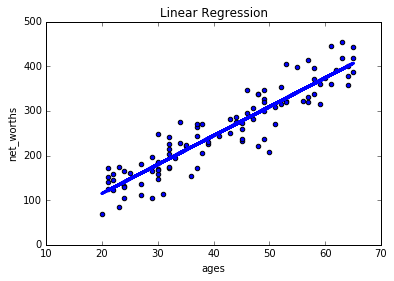

In [3]:
## Now plot our points and our line
#import seaborn as sns

plt.scatter(ages, net_worths)
plt.plot(ages, reg.predict(ages), color='blue', linewidth=3)
plt.xlabel("ages")
plt.ylabel("net_worths")
plt.title("Linear Regression")
plt.show()

### Feature Scaling

In [4]:
## Lectures used the height+weight metric example to illustrate how combining features
## with two vastly different scales/ranges is not good practice. We should rescale to 
## a new units system

""" quiz materials for feature scaling clustering """

### FYI, the most straightforward implementation might 
### throw a divide-by-zero error, if the min and max
### values are the same
### but think about this for a second--that means that every
### data point has the same value for that feature!  
### why would you rescale it?  Or even use it at all?
def featureScaling(arr):
    xmin = min(arr)
    xmax = max(arr)
    scaled_list = []
    
    for x in arr:
        x_scaled = float((x - xmin)) / (xmax - xmin)
        scaled_list.append(x_scaled)
    return scaled_list

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print featureScaling(data)

[0.0, 0.4166666666666667, 1.0]


In [5]:
## Now use sklearn's in-built re-scaler

from sklearn.preprocessing import MinMaxScaler

import numpy ## sklearn modules often need numpy

## Use the same "data" dataset as above

## weights = numpy.array(data), but we will make a new array so as to have floats

weights = numpy.array([[115.],[140.],[175.]])

scaler = MinMaxScaler()

rescaled_weights = scaler.fit_transform(weights)

rescaled_weights


array([[ 0.        ],
       [ 0.41666667],
       [ 1.        ]])